<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork21426264-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


*   Identify the distribution of data in the dataset.

*   Identify outliers in the dataset.

*   Remove outliers from the dataset.

*   Identify correlation between features in the dataset.


***


## Hands on Lab


Import the pandas module.


In [85]:
import pandas as pd

Load the dataset into a dataframe.


In [86]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

In [87]:
df.shape

(11398, 85)

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


<AxesSubplot:ylabel='Density'>

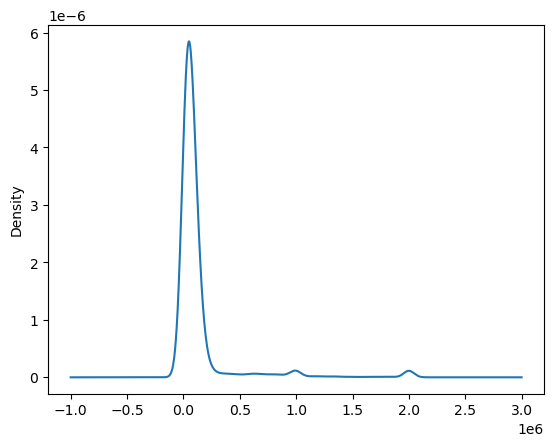

In [88]:
# your code goes here
import matplotlib.pyplot as plt
df['ConvertedComp'].plot(kind = 'kde')


Plot the histogram for the column `ConvertedComp`.


Text(0.5, 0, 'Salaries')

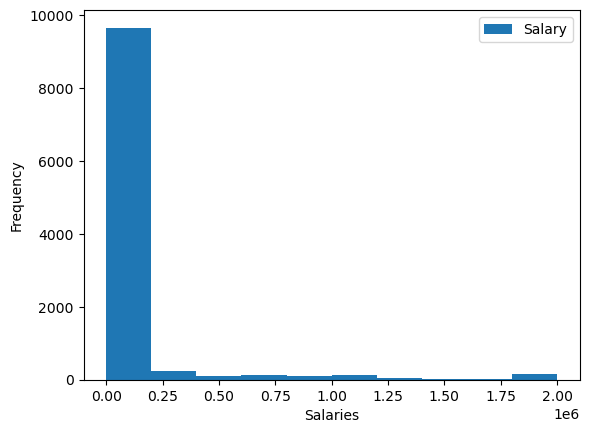

In [89]:
# your code goes here
# Plot distribution of points by Students using histogram

import matplotlib.pyplot as plt

#df.groupby('Students')['Marks'].plot(kind='hist')
df['ConvertedComp'].plot(kind = 'hist')

# Add legend to plot
plt.legend(['Salary'])

# Add x-axis label
plt.xlabel('Salaries') 

What is the median of the column `ConvertedComp`?


In [90]:
# your code goes here
df['ConvertedComp'].median()

57745.0

How many responders identified themselves only as a **Man**?


In [91]:
# your code goes here
df.columns

Index(['Respondent', 'MainBranch', 'Hobbyist', 'OpenSourcer', 'OpenSource',
       'Employment', 'Country', 'Student', 'EdLevel', 'UndergradMajor',
       'EduOther', 'OrgSize', 'DevType', 'YearsCode', 'Age1stCode',
       'YearsCodePro', 'CareerSat', 'JobSat', 'MgrIdiot', 'MgrMoney',
       'MgrWant', 'JobSeek', 'LastHireDate', 'LastInt', 'FizzBuzz',
       'JobFactors', 'ResumeUpdate', 'CurrencySymbol', 'CurrencyDesc',
       'CompTotal', 'CompFreq', 'ConvertedComp', 'WorkWeekHrs', 'WorkPlan',
       'WorkChallenge', 'WorkRemote', 'WorkLoc', 'ImpSyn', 'CodeRev',
       'CodeRevHrs', 'UnitTests', 'PurchaseHow', 'PurchaseWhat',
       'LanguageWorkedWith', 'LanguageDesireNextYear', 'DatabaseWorkedWith',
       'DatabaseDesireNextYear', 'PlatformWorkedWith',
       'PlatformDesireNextYear', 'WebFrameWorkedWith',
       'WebFrameDesireNextYear', 'MiscTechWorkedWith',
       'MiscTechDesireNextYear', 'DevEnviron', 'OpSys', 'Containers',
       'BlockchainOrg', 'BlockchainIs', 'BetterLife'

In [92]:
df['Gender'].value_counts()

Man                                                            10480
Woman                                                            731
Non-binary, genderqueer, or gender non-conforming                 63
Man;Non-binary, genderqueer, or gender non-conforming             26
Woman;Non-binary, genderqueer, or gender non-conforming           14
Woman;Man                                                          9
Woman;Man;Non-binary, genderqueer, or gender non-conforming        2
Name: Gender, dtype: int64

In [93]:
df[df['Gender'] == 'Man'].shape


(10480, 85)

Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [94]:
# your code goes here
df[df['Gender'] == 'Woman'].median()

C:\Users\Student286\AppData\Local\Temp\ipykernel_868\256852417.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df[df['Gender'] == 'Woman'].median()


Respondent       11973.0
CompTotal        65000.0
ConvertedComp    57708.0
WorkWeekHrs         40.0
CodeRevHrs           4.0
Age                 28.0
dtype: float64

Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [95]:
# your code goes here
df['Age'].describe()

count    11111.000000
mean        30.778895
std          7.393686
min         16.000000
25%         25.000000
50%         29.000000
75%         35.000000
max         99.000000
Name: Age, dtype: float64

Plot a histogram of the column `Age`.


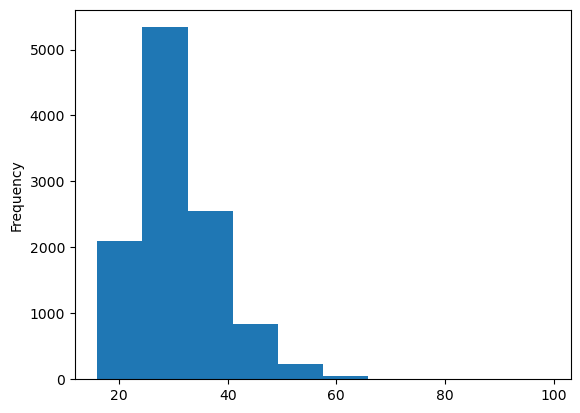

In [96]:
# your code goes here
df['Age'].plot(kind ='hist')
plt.show()

## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


In [97]:
# your code goes here
# calculate the z-score for column ConvertedComp to check for outliers
z_score = (df['ConvertedComp'] - df['ConvertedComp'].mean()) / df['ConvertedComp'].std()

# identify outliers using a z-score threshold of 3
outliers = (z_score.abs() > 3)

# print the indices of the outliers
print(df.index[outliers])

Int64Index([   13,    46,    76,   203,   210,   237,   264,   358,   370,
              405,
            ...
            11121, 11149, 11169, 11192, 11202, 11222, 11247, 11249, 11263,
            11276],
           dtype='int64', length=240)


Find out the Inter Quartile Range for the column `ConvertedComp`.


In [98]:
# your code goes here
# calculate the first and third quartiles
q1 = df['ConvertedComp'].quantile(0.25)
q3 = df['ConvertedComp'].quantile(0.75)
iqr = q3 - q1
iqr

73132.0

Find out the upper and lower bounds.


In [99]:
# your code goes here
import numpy as np

# calculate the lower and upper bounds
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

print("Lower bound: ", lower_bound)
print("Upper bound: ", upper_bound)

Lower bound:  -82830.0
Upper bound:  209698.0


Identify how many outliers are there in the `ConvertedComp` column.


In [100]:
# your code goes here
df[(df['ConvertedComp'] < lower_bound) | (df['ConvertedComp'] > upper_bound)].shape[0]


879

Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [101]:
# your code goes here

df_without_outliers = df.drop(df[(df['ConvertedComp'] < lower_bound) | (df['ConvertedComp'] > upper_bound)].index)
df_without_outliers.shape

(10519, 85)

In [104]:
#to verify I subtract the df_without_outliers.shape[0] from the df.shape[0]
#the result should be the number of outliers
df.shape[0] - df_without_outliers.shape[0]

879

## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [107]:
# your code goes here
corr_matrix = df.corr()['Age']
print(corr_matrix)

Respondent       0.004041
CompTotal        0.006970
ConvertedComp    0.105386
WorkWeekHrs      0.036518
CodeRevHrs      -0.020469
Age              1.000000
Name: Age, dtype: float64


## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork21426264-2022-01-01&cm_mmc=Email_Newsletter-\_-Developer_Ed%2BTech-\_-WW_WW-\_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
